#Assignment-15-Random-Forest

#Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("Fraud_check.csv")

In [ ]:
df=df.rename(columns={'Taxable.Income':'Tax','Marital.Status':'Status','City.Population':'Population','Work.Experience':'Exp'})

In [ ]:
df.loc[df.Tax<=30000,'Tax']='Risk'
df.loc[df.Tax != 'Risk','Tax'] ='Good'

In [ ]:
df=df.iloc[:,[2,0,1,3,4,5]]
df=pd.get_dummies(df,columns=['Undergrad','Status','Urban'],drop_first=True)

In [ ]:
train,test=train_test_split(df,test_size=0.3)

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train.iloc[:,1:7],train.iloc[:,0])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Train test accuracy

train_acc=np.mean(model.predict(train.iloc[:,1:7])==train.iloc[:,0])
test_acc=np.mean(model.predict(test.iloc[:,1:7])==test.iloc[:,0])

In [ ]:
acc=[]
for i in range(100,200,2):
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(train.iloc[:,1:7],train.iloc[:,0])
    train_acc = np.mean(clf.predict(train.iloc[:,1:7])==train.iloc[:,0])
    test_acc = np.mean(clf.predict(test.iloc[:,1:7])==test.iloc[:,0])
    acc.append([train_acc,test_acc])

In [ ]:
import matplotlib.pyplot as plt # library to do visualizations 

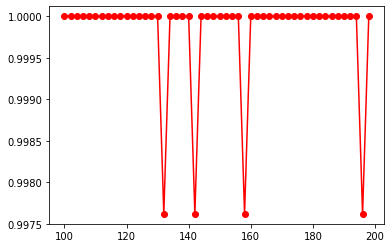

In [ ]:
# train accuracy plot 
plt.plot(np.arange(100,200,2),[i[0] for i in acc],"ro-")

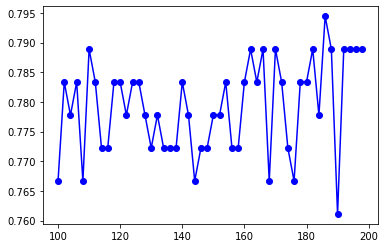

In [ ]:
# test accuracy plot
plt.plot(np.arange(100,200,2),[i[1] for i in acc],"bo-")

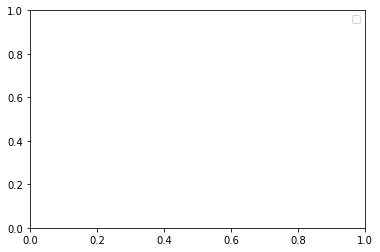

In [ ]:
plt.legend(["train","test"])



---




#Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("Company_Data.csv")

In [ ]:
df=pd.get_dummies(df,columns=['ShelveLoc','Urban','US'],drop_first=True)

In [ ]:
df.loc[df.Sales<=10,'Sales']='No'

In [ ]:
df.loc[df.Sales !='No','Sales']='Yes'

In [ ]:
train,test=train_test_split(df,test_size=0.3)

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train.iloc[:,1:12],train.iloc[:,0])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#To find train and test accuracy
train_acc=np.mean(model.predict(train.iloc[:,1:12])==train.iloc[:,0])
test_acc=np.mean(model.predict(test.iloc[:,1:12])==test.iloc[:,0])

In [ ]:
acc=[]

In [ ]:
for i in range(100,200,2):
    model=RandomForestClassifier(n_estimators=i)
    model.fit(train.iloc[:,1:12],train.iloc[:,0])
    train_acc=np.mean(model.predict(train.iloc[:,1:12])==train.iloc[:,0])
    test_acc=np.mean(model.predict(test.iloc[:,1:12])==test.iloc[:,0])
    acc.append([train_acc,test_acc])

In [ ]:
#library to do visualizations 
import matplotlib.pyplot as plt 

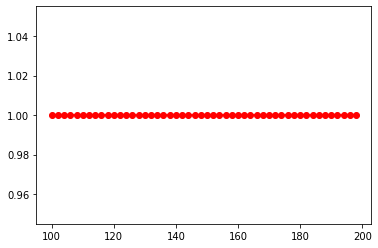

In [ ]:
# train accuracy plot 
plt.plot(np.arange(100,200,2),[i[0] for i in acc],"ro-")

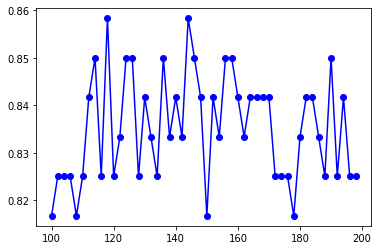

In [ ]:
# test accuracy plot
plt.plot(np.arange(100,200,2),[i[1] for i in acc],"bo-")